<a href="https://colab.research.google.com/github/siddhant-dutta/MM204_PROGRAMMING_ASSIGNMENT_TEAM19/blob/master/MM204_PROG_ASSGN_TEAM19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
### INITIALIZING CONSTANTS ###

print(f"Enter appropriate value of step size of position : ")
del_x = float(input())
h = 1100
k = 30
L = 0.01
T_inf = 250
q1 = 10**7
q2 = 2*(10**7)
alpha = 5*(10**-6)

Enter appropriate value of step size of position : 
0.002


In [4]:
### STABILITY CRITERION -> Fo(1+Bi)≤ 0.5 ###

Bi = h*del_x/k
Fo_max = 0.5/(1+Bi)
del_t_max = Fo_max*(del_x**2)/alpha

In [5]:
### CHOOSING APPROPRIATE TIME STEP SIZE ###

print(f"Fo <= {Fo_max}") 
print(f"del_t <= {del_t_max}")
print(f"Enter appropriate value of step size of time : ")
del_t = float(input())
Fo = del_t*alpha/(del_x**2)

Fo <= 0.46583850931677023
del_t <= 0.3726708074534162
Enter appropriate value of step size of time : 
0.3


In [6]:
# tot_time -> total time under observation 
print(f"Enter the total time of observation : ")
tot_time = float(input())  
rows = int(tot_time/del_t) + 1
cols = int(0.01/del_x) + 1

T = [[0 for i in range(cols)] for j in range(rows)]
# row - time 
# col - position 

Enter the total time of observation : 
300


In [137]:
def Tdist_init():
  """ The initial temperature distribution i.e before changing 
      the rate of heat generation, must be known 
  """
  T[0][cols-1] = T_inf + q1*L/h
  x = 0
  for j in range(cols-1):
    T[0][j] = ((q1*L*L)/(2*k))*(1 - (x/L)**2) + T[0][cols-1]
    x += del_x


In [138]:
Tdist_init()

In [139]:
def Tdist_time_varying():
  """ Since now we have the initial temperature distribution we now find Temperature 
      distribution with increasing time according to the chosen time step 
  """
  for i in range(rows-1):
    for j in range(cols):
      if j==0:
        T[i+1][j] = Fo*(2*T[i][j+1]+q2*(del_x**2)/k) + (1-2*Fo)*T[i][j]
      elif j==cols-1:
        T[i+1][j] = 2*Fo*(T[i][j-1]+Bi*T_inf+q2*(del_x**2)/(2*k)) + (1-2*Fo-2*Bi*Fo)*T[i][j]
      else:
        T[i+1][j] = Fo*(T[i][j-1]+T[i][j+1]+q2*(del_x**2)/k) + (1-2*Fo)*T[i][j]


In [140]:
Tdist_time_varying()
col_names = []
for j in range(cols) :
  col_names.append(str(j))
df = pd.DataFrame(T)
print(f"The temperature distribution at t = 1.5 sec is in the row with index {1.5/del_t} ")
print(f"Moreover the temperature distribution after large amount of time is in the last row")
df

The temperature distribution at t = 1.5 sec is in the row with index 5.0 
Moreover the temperature distribution after large amount of time is in the last row


,0,1,2,3,4,5
0,357.575758,356.909091,354.909091,351.575758,346.909091,340.909091
1,358.075758,357.409091,355.409091,352.075758,347.409091,341.409091
2,358.575758,357.909091,355.909091,352.575758,347.909091,341.881591
3,359.075758,358.409091,356.409091,353.075758,348.398778,342.348728
4,359.575758,358.909091,356.909091,353.571890,348.883877,342.807086
...,...,...,...,...,...,...
996,464.337223,463.009202,459.025070,452.384621,443.087512,431.133270
997,464.341207,463.013160,459.028951,452.388374,443.091087,431.136622
998,464.345172,463.017099,459.032813,452.392108,443.094645,431.139957
999,464.349118,463.021019,459.036656,452.395824,443.098186,431.143275


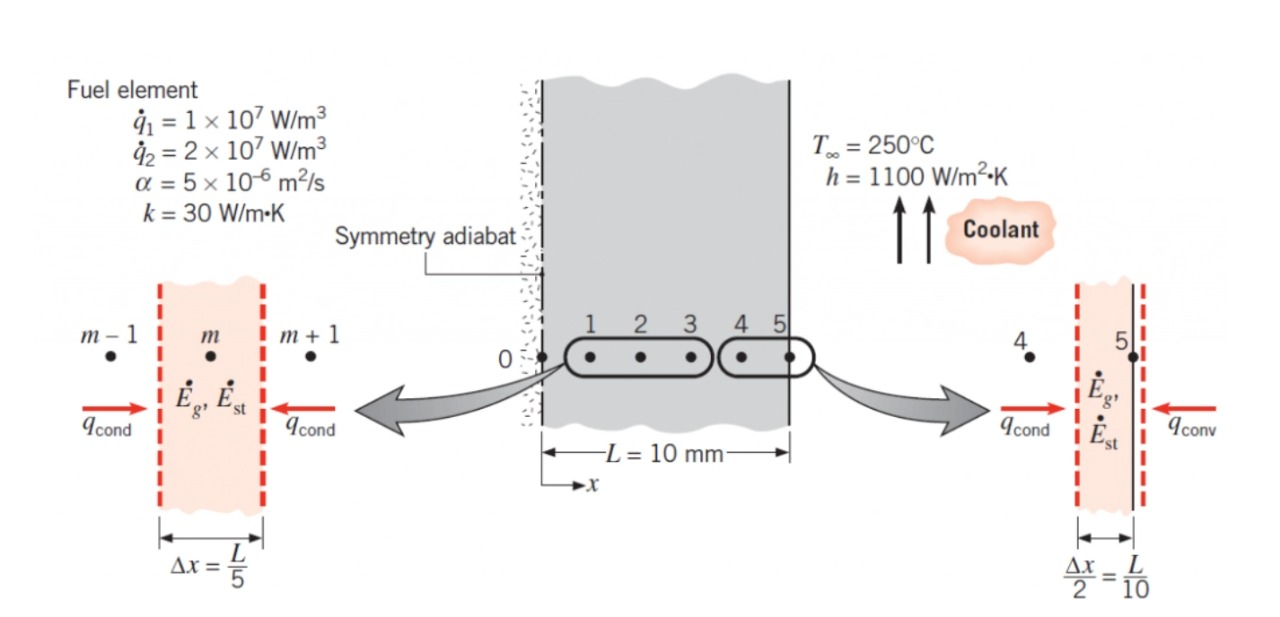

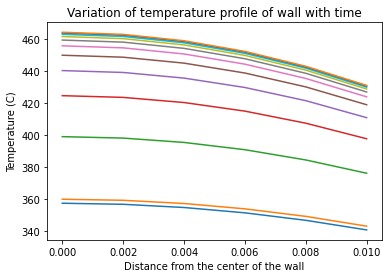

In [141]:
import matplotlib.pyplot as plt

x = []
for i in range(cols):
  x.append(i*del_x)
y = []
for i in range(int(rows/100)+1):
  y.append(T[i*100])
  if i==0:
    y.append(T[int(1.5/del_t)])

plt.title("Variation of temperature profile of wall with time")
plt.xlabel("Distance from the center of the wall")
plt.ylabel("Temperature (C)")
plt.plot(x, np.array(y).T)
plt.show()